In [5]:
from IPython.core.display import display, HTML, Javascript, clear_output, Image
display(HTML("<style>.container { width:80% !important; } </style>"))

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/bioservices_net.jpg" width="800" height="800">](https://bioservices.readthedocs.io/en/master/)

+ ### Biosersevices es un paquete de Python que proporciona acceso a muchos servicios web de bioinformáticos.

+ ### El objetivo principal de BioServices es utilizar Python como lenguaje para proporcionar un acceso programático, esto fomentará la elaboración de nuevas aplicacioness que combinen varios servicios.

+ ### Una de las principales filosofías de BioServices es hacer uso de las bases de datos biológicas existentes (no reinventar nuevas bases de datos) y solucionar las necesidades de experiencia en Servicios Web para los desarrolladores / usuarios.

+ ### BioServices proporciona acceso a más de 40 servicios web.

In [6]:
import sys, os
sys.path.append("../binarios/")

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import edu
import warnings
warnings.filterwarnings("ignore")

import re, sys
from datetime import datetime
import json # JavaScript Object Notation, «notación de objeto de JavaScript»
import requests # para hacer solicitudes HTTP para tener acceso rápido a servicios web
import urllib.request 

<b style="font-size:2vw"><font color = grey>ChEMBL</font></b>

<hr>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/chembl.png" width="500" height="500">](https://www.ebi.ac.uk/chembl/)

In [7]:
from bioservices import ChEMBL

In [8]:
ch = ChEMBL()

### extraer un compuesto específico
CHEMBL7, CHEMBL50, CHEMBL77, CHEMBL237

In [9]:
entrada = 'CHEMBL50'

In [10]:
try:
    com = ch.get_molecule(entrada)
    print('Si existe')
except:
    print('No existe')

Si existe


In [12]:
com

{'atc_classifications': [],
 'availability_type': None,
 'biotherapeutic': None,
 'black_box_warning': 0,
 'chebi_par_id': 16243,
 'chirality': 2,
 'cross_references': [{'xref_id': '11111704',
   'xref_name': 'SID: 11111704',
   'xref_src': 'PubChem'},
  {'xref_id': '11111705', 'xref_name': 'SID: 11111705', 'xref_src': 'PubChem'},
  {'xref_id': '11111706', 'xref_name': 'SID: 11111706', 'xref_src': 'PubChem'},
  {'xref_id': '11113933', 'xref_name': 'SID: 11113933', 'xref_src': 'PubChem'},
  {'xref_id': '124881262',
   'xref_name': 'SID: 124881262',
   'xref_src': 'PubChem'},
  {'xref_id': '124881263',
   'xref_name': 'SID: 124881263',
   'xref_src': 'PubChem'},
  {'xref_id': '124881264',
   'xref_name': 'SID: 124881264',
   'xref_src': 'PubChem'},
  {'xref_id': '124881266',
   'xref_name': 'SID: 124881266',
   'xref_src': 'PubChem'},
  {'xref_id': '124881267',
   'xref_name': 'SID: 124881267',
   'xref_src': 'PubChem'},
  {'xref_id': '124881272',
   'xref_name': 'SID: 124881272',
   'xr

In [13]:
print('ID:', com['molecule_chembl_id'])

ID: CHEMBL50


In [14]:
print('Name:', com['pref_name'])

Name: QUERCETIN


In [15]:
com['molecule_properties']

{'alogp': '1.99',
 'aromatic_rings': 3,
 'cx_logd': '1.00',
 'cx_logp': '2.16',
 'cx_most_apka': '6.38',
 'cx_most_bpka': None,
 'full_molformula': 'C15H10O7',
 'full_mwt': '302.24',
 'hba': 7,
 'hba_lipinski': 7,
 'hbd': 5,
 'hbd_lipinski': 5,
 'heavy_atoms': 22,
 'molecular_species': 'ACID',
 'mw_freebase': '302.24',
 'mw_monoisotopic': '302.0427',
 'num_lipinski_ro5_violations': 0,
 'num_ro5_violations': 0,
 'psa': '131.36',
 'qed_weighted': '0.43',
 'ro3_pass': 'N',
 'rtb': 1}

In [16]:
print('Molecular Formula:', com['molecule_properties']['full_molformula'])

Molecular Formula: C15H10O7


In [17]:
print('Molecular Weight:', com['molecule_properties']['full_mwt'])

Molecular Weight: 302.24


In [18]:
print('https://www.ebi.ac.uk/chembl/compound_report_card/'+entrada)

https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL50


##### Visualización de propiedades químicas de compuestos depositados en la base de datos ChEMBL

In [19]:
init = edu.time_ini()
res = []
for i in range(1,201):
    try:
        res.append(ch.get_molecule("CHEMBL"+str(i)))
    except:
        pass
edu.time_fin(i = init)

Time: 0:00:41


In [22]:
res_l = []
for e, i in enumerate(res):
    if i['molecule_properties']['alogp'] == None:
        pass
    else:
        res_l.append([i['molecule_chembl_id'],
                      float(i['molecule_properties']['alogp']),
                      float(i['molecule_properties']['full_mwt'])])

In [23]:
res_l

[['CHEMBL1', 4.87, 544.6],
 ['CHEMBL2', 1.78, 383.41],
 ['CHEMBL3', 1.85, 162.24],
 ['CHEMBL4', 1.54, 361.37],
 ['CHEMBL5', 1.42, 232.24],
 ['CHEMBL6', 3.93, 357.79],
 ['CHEMBL8', 1.58, 331.35],
 ['CHEMBL9', 1.27, 319.34],
 ['CHEMBL10', 4.68, 377.44],
 ['CHEMBL11', 3.88, 280.42],
 ['CHEMBL12', 3.15, 284.75],
 ['CHEMBL13', 1.61, 267.37],
 ['CHEMBL14', -0.21, 182.65],
 ['CHEMBL16', 1.97, 252.27],
 ['CHEMBL17', 0.29, 305.16],
 ['CHEMBL18', 1.34, 258.32],
 ['CHEMBL19', -1.42, 236.28],
 ['CHEMBL20', -0.86, 222.25],
 ['CHEMBL21', -0.08, 172.21],
 ['CHEMBL22', 1.26, 290.32],
 ['CHEMBL23', 3.37, 414.53],
 ['CHEMBL24', 0.45, 266.34],
 ['CHEMBL25', 1.31, 180.16],
 ['CHEMBL26', 0.56, 341.43],
 ['CHEMBL27', 2.58, 259.35],
 ['CHEMBL28', 2.58, 270.24],
 ['CHEMBL29', 0.86, 334.4],
 ['CHEMBL30', 0.6, 252.35],
 ['CHEMBL31', 1.98, 375.4],
 ['CHEMBL32', 2.37, 401.44],
 ['CHEMBL33', 1.54, 361.37],
 ['CHEMBL34', -3.01, 244.21],
 ['CHEMBL35', 1.89, 330.75],
 ['CHEMBL36', 2.52, 248.72],
 ['CHEMBL38', 5.6, 30

In [24]:
ChEMBL_df = DataFrame(np.array(res_l)[:, 1:], index = np.array(res_l)[:, 0], columns = ['ALogP', 'Molecular_Weight'])
ChEMBL_df = ChEMBL_df.astype(float)

In [25]:
ChEMBL_df

,ALogP,Molecular_Weight
CHEMBL1,4.87,544.60
CHEMBL2,1.78,383.41
CHEMBL3,1.85,162.24
CHEMBL4,1.54,361.37
CHEMBL5,1.42,232.24
...,...,...
CHEMBL193,2.18,346.34
CHEMBL195,1.93,289.37
CHEMBL196,-1.41,176.12
CHEMBL197,5.09,454.61


In [35]:
fig = plt.figure(figsize=(7, 5))

ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlim(0, 1000)
ax.set_ylim(-10, 10)

ax.scatter(ChEMBL_df.Molecular_Weight, # eje x
           ChEMBL_df.ALogP,            # eje y
           s = 100,                    # tamaño de la marca
           marker = 's',               # estilo de la marca: 'o', 'v', '^', '<', '>', 's', 'p', 'H', '*', 'D'
           c = 'black',                # color de la marca 
           linewidth = 0.7,              # borde la la marca
           edgecolors = 'red',         # color del borde de la marca
           alpha = 0.5)                # opacidad de la marca, escala de 0 a 1

ax.set_xlabel('Molecular_Weight', size = 12, weight = 'bold')
ax.set_ylabel('ALogP', size = 12, weight = 'bold')

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)


ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
plt.close()

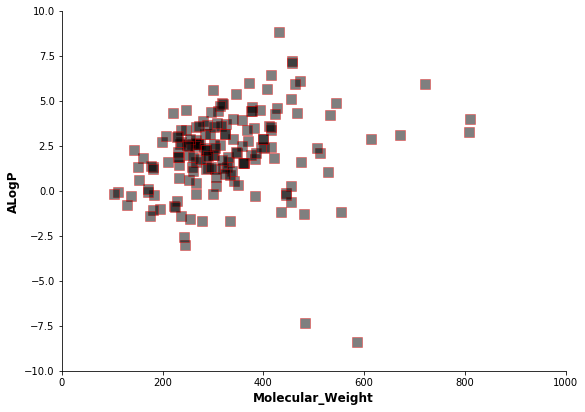

In [36]:
fig

In [ ]:
# fig.savefig('../salidas/scatter.png', dpi = 900, bbox_inches= 'tight')

<b style="font-size:2vw"><font color = grey>WikiPathways</font></b>

<hr>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/wikipathways.png" width="500" height="500">](https://www.wikipathways.org/index.php/WikiPathways)

In [56]:
from bioservices import WikiPathways

In [60]:
wi = WikiPathways()

INFO    [bioservices:WikiPathways]:  Initialising WikiPathways service (REST)
INFO    [bioservices:WikiPathways]:  Fetching organisms...


#### lista de vías disponibles en WikiPathways

In [130]:
vias = wi.listPathways()[['name', 'species', 'revision']]

In [131]:
vias

,name,species,revision
id,,,
WP1,Statin pathway,Mus musculus,117947
WP10,IL-9 signaling pathway,Mus musculus,117067
WP100,Glutathione metabolism,Homo sapiens,107114
WP1000,Arachidonate epoxygenase / epoxide hydrolase,Bos taurus,117475
WP1001,Peptide GPCRs,Bos taurus,115319
...,...,...,...
WP995,Prostaglandin synthesis and regulation,Bos taurus,117590
WP996,EPO receptor signaling,Bos taurus,117505
WP997,Cytokines and inflammatory response,Bos taurus,117494


diccionario con el ID de la vía y el número de revisión

In [118]:
via_rev = dict(zip(vias.index, vias.revision))
via_rev

{'WP1': '117947',
 'WP10': '117067',
 'WP100': '107114',
 'WP1000': '117475',
 'WP1001': '115319',
 'WP1002': '117502',
 'WP1004': '115956',
 'WP1005': '117527',
 'WP1006': '80841',
 'WP1007': '117578',
 'WP1008': '105985',
 'WP1009': '116824',
 'WP101': '116930',
 'WP1010': '117625',
 'WP1011': '117623',
 'WP1012': '117547',
 'WP1013': '117631',
 'WP1014': '115964',
 'WP1015': '117614',
 'WP1016': '117633',
 'WP1017': '86918',
 'WP1018': '95783',
 'WP1019': '117075',
 'WP102': '117302',
 'WP1020': '117511',
 'WP1021': '107051',
 'WP1022': '117535',
 'WP1023': '95764',
 'WP1024': '117619',
 'WP1025': '117479',
 'WP1026': '116570',
 'WP1027': '117532',
 'WP1028': '117592',
 'WP1029': '117568',
 'WP103': '116834',
 'WP1030': '116453',
 'WP1031': '117538',
 'WP1032': '117028',
 'WP1033': '117471',
 'WP1034': '117472',
 'WP1035': '80710',
 'WP1036': '118344',
 'WP1037': '116817',
 'WP1038': '116514',
 'WP104': '111147',
 'WP1040': '117545',
 'WP1041': '117611',
 'WP1042': '80660',
 'WP1043

#### lista de organismos disponibles en WikiPathways

In [91]:
organismos = wi.listOrganisms()

In [111]:
organismos[:10]

['Unspecified',
 'Acetobacterium woodii',
 'Anopheles gambiae',
 'Arabidopsis thaliana',
 'Bacillus subtilis',
 'Beta vulgaris',
 'Bos taurus',
 'Caenorhabditis elegans',
 'Canis familiaris',
 'Clostridium thermocellum']

#### selección de una vía

In [123]:
entry = 'WP1046'

In [124]:
via_rev[entry]

'118734'

#### muestra la vía en el navegador

In [125]:
wi.showPathwayInBrowser(entry)

#### información sobre la vía

In [126]:
wi.getPathwayInfo(entry)

{'id': 'WP1046',
 'url': 'https://www.wikipathways.org/index.php/Pathway:WP1046',
 'name': 'Hepatocyte growth factor receptor signaling',
 'species': 'Bos taurus',
 'revision': '118734'}

In [127]:
code = '<iframe src ="https://www.wikipathways.org/wpi/PathwayWidget.php?id='+entry+\
'&rev='+via_rev[entry]+'" width="900px" height="600px" style="overflow:hidden;"></iframe>'
HTML(code)

<b style="font-size:2vw"><font color = grey>QuickGO</font></b>

<hr>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/quickgo.png" width="500" height="500">](https://www.ebi.ac.uk/QuickGO/)

In [3]:
from bioservices import QuickGO

In [4]:
qu = QuickGO()

In [2]:
def hojas(dict_hoja = dict()):
    final = []
    for i in dict_hoja.keys():
        for j in dict_hoja[i]['results']:
            final.append([re.sub('UniProtKB:','', j['geneProductId']),
                           j['qualifier'],
                           j['goId'],
                           j['goName'],
                           j['goEvidence'],
                           j['goAspect'],
                           j['evidenceCode'],
                           j['reference'],
                           j['withFrom'],
                           j['taxonId'],
                           j['taxonName'],
                           j['assignedBy'],
                           j['extensions'],
                           j['targetSets'],
                           j['symbol'],
                           j['date'],
                           j['synonyms'],
                           j['name']])
    return final

In [45]:
lista = ['P22147', 'P33302', 'Q03834', 'P06169', 'P12904', 'P08539', 'P06782', 'P02994', 'P25847', 'P32485', 'P28240', 'P41277', 'P53104', 'P46946', 'P38766', 'P31378', 'P32791', 'P39013', 'P32478', 'P47001', 'P19145', 'P38631', 'P32324', 'P10081', 'P32944', 'P61830', 'Q08214', 'P53154', 'P11484', 'Q03497', 'P40353', 'P14164', 'P06106', 'P19524', 'P07271', 'P32561', 'P16467', 'P26263', 'P38182', 'P16521', 'P19880', 'P12962', 'P04147', 'P33399', 'P34163', 'P22579', 'P39015', 'P02400', 'P01120', 'P06780', 'P37012', 'P39929', 'P17898', 'P27636', 'P29465', 'P28319', 'P14065', 'P32768', 'P25358', 'Q06628', 'P40107', 'P06785', 'P22217', 'Q04049', 'P20840', 'P06700', 'P05750', 'P12868', 'P53632', 'P06104', 'Q12068', 'P32356', 'Q03529', 'Q08548', 'P10591', 'P00330', 'P32471', 'P09119', 'P00359', 'P32807', 'P38270', 'P38013', 'P32447', 'P38225', 'Q05902', 'Q12246', 'P07260', 'P31539', 'P33751', 'P31755', 'P53049', 'P32336', 'Q04119', 'P47013', 'Q00055', 'P17695', 'Q07478', 'P32905', 'P05375', 'P05318', 'P33775', 'P14126', 'P07270', 'P32597', 'P38086', 'P30624', 'P32318', 'Q01589', 'P10870', 'Q00947', 'P22146', 'Q12522', 'P80428', 'Q05521', 'P37298', 'P89105', 'P06634', 'P00044', 'P60010', 'Q12527', 'Q12142', 'Q00684', 'P05453', 'Q06408', 'Q06410', 'P40319', 'Q12127', 'P32479', 'P38830', 'Q01159', 'P04807', 'P32521', 'P25336', 'Q00764', 'P14242', 'P40073', 'P23615', 'P18898', 'P25443', 'P26783', 'Q00711', 'P54867', 'P31688', 'P22216', 'P39940', 'Q04121', 'P36421', 'P05317', 'P33333', 'P32500', 'P32849', 'P33421', 'P45818', 'P38703', 'P32589', 'P25846', 'P32354', 'P38257', 'P0C0W9', 'P39001', 'P40343', 'P39006', 'P10862', 'P29539', 'P16603', 'P07278', 'P31382', 'P23202', 'P32939', 'Q01662', 'P04802', 'P26785', 'P34226', 'P32914', 'P0CX47', 'P38990', 'P14832', 'P22140', 'P08640', 'P02293', 'P35193', 'P53855', 'P14540', 'P40471', 'P53301', 'P10127', 'O13297', 'P48524', 'P08679', 'P53264', 'Q02948', 'P14904', 'P22007', 'P40344', 'P32623', 'P41735', 'P25376', 'Q01574', 'P07261', 'P15436', 'P31384', 'P00549', 'P54115', 'P41911', 'P32895', 'Q12114', 'P13382', 'P40989', 'P22149', 'P38998', 'P07250', 'Q04437', 'P36027',
         'P25644', 'P21374', 'P10592', 'P22211', 'Q12207', 'Q10740', 'P20485', 'P00942', 'P17255', 'P08067', 'P27654', 'P09620', 'P32527', 'Q02792', 'P38339', 'P09232', 'P11632', 'P32571', 'P48813', 'P47116', 'Q02775', 'P0CX43', 'Q04739', 'P07866', 'P10622', 'P80210', 'P0CX44', 'Q12098', 'P22082', 'Q03148', 'P21801', 'P32790', 'P32558', 'P38827', 'P00445', 'P53043', 'P34164', 'P20052', 'P10659', 'Q02455', 'Q755A9', 'A6ZQE9', 'Q99316', 'P0CD99', 'P38994', 'P0CX80', 'Q03776', 'P38698', 'P11612', 'P30656', 'O13377', 'P36002', 'P34222', 'Q753L9', 'P40100', 'P07256', 'P00127', 'P25635', 'Q09794', 'P07259', 'Q92378', 'P01119', 'P41056', 'Q12224', 'Q07829', 'P46784', 'A6ZPC2', 'P32608', 'P17558', 'P14693', 'P78976', 'A5E5G3', 'Q12136', 'A6ZYV1', 'P22214', 'P14906', 'Q75D26', 'Q04002', 'Q12369', 'Q08817', 'P53953', 'P53438', 'E7QCS8', 'A6ZRZ4', 'P40092', 'C7GVQ9', 'O43017', 'A5E3W5', 'A6ZRQ0', 'P11325', 'Q08749', 'A5E4Z8', 'P07277', 'A6ZMC4', 'P32435', 'Q07684', 'Q75EZ5', 'Q752T7', 'P40356', 'P38335', 'C8ZC77', 'Q852Q0', 'P0CE92', 'P25580', 'P50947', 'C7GQI9', 'P32598', 'O13516', 'B5VNY0', 'P40910', 'P53236', 'Q02206', 'A6ZM92', 'O14464', 'P33330', 'Q15459', 'C7GX58', 'E7QJS8', 'Q75DR2', 'P50278', 'P38282', 'P53266', 'Q75EA5', 'Q06091', 'P23201', 'B5VHP4', 'P36136', 'P25567', 'Q759G7', 'P63272', 'P39926', 'Q04048', 'Q758C9', 'P53215', 'Q12308', 'Q07904', 'P35202', 'Q12218', 'E7QFR8', 'P32613', 'Q03533', 'A6ZYC3', 'B3RHK4', 'P28569', 'Q06451', 'A6ZV78', 'Q04600', 'P47168', 'P53872', 'Q12428', 'P33329', 'Q75BZ1', 'A6ZLH6', 'P25043', 'P10363', 'Q5ALW7', 'Q9ZZW2', 'Q9ZZW1', 'Q66929', 'Q03956', 'C7GP35', 'Q06109', 'P0CX52', 'P38165', 'P46654', 'Q03919', 'A6ZXL1', 'P53305', 'P42847', 'P38804', 'Q05543', 'P35179', 'Q08986', 'P53189', 'Q75D68', 'P42223', 'Q08230', 'Q758M7', 'Q03323', 'P25365', 'Q74Z37', 'Q74ZJ5', 'Q99287', 'A5DUA3', 'Q04053', 'B3LI04', 'Q12306', 'A6ZT44', 'Q07798', 'P25554', 'B3LFU6', 'P33336', 'P38751', 'P42843', 'Q12020', 'Q05471', 'E7KPZ3', 'P46675', 'Q12427', 'P08459', 'P15179', 'P32522', 'Q75E56', 'P27616', 'P32863', 'B5VQJ1', 'Q04779', 'A0A0B7P221', 'Q92379', 'Q07048', 'A6ZM32', 'Q04418', 'P40395', 'P32862', 'Q08003', 'P48743', 'P27671', 'Q75ET5', 'Q754N8', 'P0CX86', 'Q75CF3', 'P52434', 'P17890', 'Q75AP6', 'C7GPE4', 'P53064', 'A6ZYX9', 'Q75BF1', 'A6ZTB4', 'P33754', 'C8ZCV7', 'P38345', 'E7NM81', 'C8ZCC8', 'Q750D5', 'Q08581', 'Q04902', 'B3LMT5', 'P40031', 'A5DTX3', 'P40167', 'Q12118', 'P32566', 'P38717', 'Q08673', 'P40342', 'O74727', 'P38789', 'P40164', 'P50109', 'Q9NRF8', 'P37299', 'Q7Z895', 'Q12188', 'Q55075', 'Q03530', 'P54728', 'Q12090', 'P38883', 'P0CX83', 'P05745', 'B3LTX4', 'P36070', 'P48164', 'P36047', 'P53313', 'P39709', 'Q8NKG9', 'Q75BW4', 'Q08826', 'Q12420', 'P33338', 'A6ZR73', 'E7Q311']
lista = list(set(lista))

In [81]:
total = len(lista)
total

1

In [82]:
init = edu.time_ini()
dl = 0
resultado = []
suma = 0

for k in range(0, total, 100):
    serie_cien = ''.join(','.join(lista[k:k+100]))
    ##
    exploracion = qu.Annotation(page = 1, geneProductId  = serie_cien)
    total_pages = exploracion['pageInfo']['total']
    lista_paginas = list(range(1,total_pages+1))
    res = {}
    ids = []
    for i in list(range(1,total_pages+1)):
        res[i] = qu.Annotation(page = i, geneProductId  = serie_cien)
        if res[i] == 400:
            res.pop(i)
        for f in res[i]['results']:
            ids.append(re.sub('-.*', '',f['geneProductId'].split(':')[1]))
    suma += len(set(ids))
    ##
    dl += len(serie_cien.split(','))
    done = int(40 * dl / total)
    sys.stdout.write("\r [%s%s] (%s)  " % ('>' * done, ' ' * (40-done), dl))
    sys.stdout.flush()


    header = ['Entry','qualifier','goId','goName','goEvidence','goAspect','evidenceCode','reference',
                'withFrom','taxonId','taxonName','assignedBy','extensions','targetSets','symbol',
                'date','synonyms','name']
    resultado.append(DataFrame(hojas(dict_hoja = res), columns = header))
edu.time_fin(i = init)

 [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] (1)  Time: 0:00:01


In [83]:
complete_annotation = pd.concat(resultado)

In [84]:
complete_annotation

,Entry,qualifier,goId,goName,goEvidence,goAspect,evidenceCode,reference,withFrom,taxonId,taxonName,assignedBy,extensions,targetSets,symbol,date,synonyms,name
0,E9PAD8,located_in,GO:0016020,None,IEA,cellular_component,ECO:0000323,GO_REF:0000043,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i...",559292,None,UniProt,None,None,E9PAD8,20210724,None,None
1,E9PAD8,located_in,GO:0016021,None,IEA,cellular_component,ECO:0000323,GO_REF:0000043,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i...",559292,None,UniProt,None,None,E9PAD8,20210724,None,None


In [51]:
df = DataFrame(lista, columns = ['Entry'])
df

,Entry
0,P17898
1,P07270
2,P50109
3,Q12218
4,P63272
...,...
482,Q04437
483,P39940
484,P00330
485,P36027


In [52]:
df.merge(complete_annotation, on = 'Entry', how = 'left')

,Entry,qualifier,goId,goName,goEvidence,goAspect,evidenceCode,reference,withFrom,taxonId,taxonName,assignedBy,extensions,targetSets,symbol,date,synonyms,name
0,P17898,located_in,GO:0016020,None,IEA,cellular_component,ECO:0000256,GO_REF:0000002,"[{'connectedXrefs': [{'db': 'InterPro', 'id': ...",559292.0,None,InterPro,None,None,CPT1,20210724,None,None
1,P17898,involved_in,GO:0008654,None,IEA,biological_process,ECO:0000256,GO_REF:0000002,"[{'connectedXrefs': [{'db': 'InterPro', 'id': ...",559292.0,None,InterPro,None,None,CPT1,20210724,None,None
2,P17898,enables,GO:0016780,None,IEA,molecular_function,ECO:0000256,GO_REF:0000002,"[{'connectedXrefs': [{'db': 'InterPro', 'id': ...",559292.0,None,InterPro,None,None,CPT1,20210724,None,None
3,P17898,located_in,GO:0005789,None,IEA,cellular_component,ECO:0000323,GO_REF:0000044,[{'connectedXrefs': [{'db': 'UniProtKB-SubCell...,559292.0,None,UniProt,None,None,CPT1,20210724,None,None
4,P17898,located_in,GO:0005741,None,IEA,cellular_component,ECO:0000323,GO_REF:0000044,[{'connectedXrefs': [{'db': 'UniProtKB-SubCell...,559292.0,None,UniProt,None,None,CPT1,20210724,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13890,P52434,part_of,GO:0005665,None,IDA,cellular_component,ECO:0000314,PMID:9852112,None,9606.0,None,UniProt,None,None,POLR2H,20090824,None,None
13891,P52434,involved_in,GO:0006351,None,IEA,biological_process,ECO:0000256,GO_REF:0000002,"[{'connectedXrefs': [{'db': 'InterPro', 'id': ...",9606.0,None,InterPro,None,None,POLR2H,20210724,None,None
13892,P52434,located_in,GO:0005634,None,IEA,cellular_component,ECO:0000323,GO_REF:0000043,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i...",9606.0,None,UniProt,None,None,POLR2H,20210724,None,None
13893,P52434,enables,GO:0003677,None,IEA,molecular_function,ECO:0000323,GO_REF:0000043,"[{'connectedXrefs': [{'db': 'UniProtKB-KW', 'i...",9606.0,None,UniProt,None,None,POLR2H,20210724,None,None


<b style="font-size:2vw"><font color = grey>UniProtKB</font></b>

<hr>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/uniprot.png" width="500" height="500">](https://www.uniprot.org/)

#### extraer información funcional desde UniProtKB

In [68]:
id_organism = requests.get("https://www.uniprot.org/uniprot/?query="+lista[0]+"&sort=score&columns=organism-id&format=tab&limit=1").content.decode()
Prefix = id_organism.split('\n')[1]
Prefix

'559292'

In [75]:
uni = urllib.request.urlretrieve('https://www.uniprot.org/uniprot/?query=organism:'+Prefix+'&format=tab&columns=id,genes,go-id',
                                 '../salidas/annotation_'+Prefix)

In [76]:
prot_version = uni[1]['Last-Modified']
go_uniptot_version = uni[1]['Last-Modified']
print('UniProtKB version: ', prot_version)
print('Entries: ', uni[1]['X-Total-Results'])

UniProtKB version:  Wed, 07 Oct 2020 00:00:00 GMT
Entries:  6730


In [184]:
acc_GOid=pd.read_csv('../salidas/annotation_'+Prefix, sep = '\t')#.dropna().reset_index(drop=True)
acc_GOid.columns = ['Entry', 'Gene', 'GO']

In [185]:
acc_GOid

,Entry,Gene,GO
0,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0004478; GO:0005524; GO:0005737; GO:0005829...
1,Q02455,MLP1 YKR095W YKR415,GO:0003729; GO:0005635; GO:0005643; GO:0005654...
2,Q99316,MPD2 YOL088C O0941,GO:0003756; GO:0005783; GO:0006457; GO:0015035
3,P0CD99,MPH2 YDL247W,GO:0000017; GO:0000023; GO:0005351; GO:0005363...
4,P38994,MSS4 YDR208W YD8142A.05,GO:0005524; GO:0005634; GO:0005886; GO:0016308...
...,...,...,...
6725,E9PAD8,NaN,GO:0016021
6726,E9PAF1,NaN,NaN
6727,E9PAE8,NaN,NaN
6728,E9PAD6,NaN,GO:0016021


In [188]:
sin_nas = acc_GOid[pd.notna(acc_GOid['GO'])]
sin_nas

,Entry,Gene,GO
0,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0004478; GO:0005524; GO:0005737; GO:0005829...
1,Q02455,MLP1 YKR095W YKR415,GO:0003729; GO:0005635; GO:0005643; GO:0005654...
2,Q99316,MPD2 YOL088C O0941,GO:0003756; GO:0005783; GO:0006457; GO:0015035
3,P0CD99,MPH2 YDL247W,GO:0000017; GO:0000023; GO:0005351; GO:0005363...
4,P38994,MSS4 YDR208W YD8142A.05,GO:0005524; GO:0005634; GO:0005886; GO:0016308...
...,...,...,...
6720,P40217,TIF34 YMR146C YM9375.16C,GO:0001732; GO:0002183; GO:0002188; GO:0003723...
6724,E9PAE3,truncated TYB,GO:0003723; GO:0003887; GO:0003964; GO:0004190...
6725,E9PAD8,NaN,GO:0016021
6728,E9PAD6,NaN,GO:0016021


In [189]:
uniprot_anotation_org = []
for index, row in sin_nas.iterrows():
    for j in row.GO.split('; '):
        if re.search('GO:\d+', j):
            uniprot_anotation_org.append([row.Entry, row.Gene, re.search('GO:\d+', j).group()])
# este df contiene toda la anotación GO en uniprot del organismo en estudio
Entry_GOid_annotated =DataFrame(uniprot_anotation_org, columns = ['Entry', 'Gene', 'GO'])

In [190]:
Entry_GOid_annotated

,Entry,Gene,GO
0,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0004478
1,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0005524
2,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0005737
3,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0005829
4,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0006555
...,...,...,...
48994,E9PAE3,truncated TYB,GO:0005737
48995,E9PAE3,truncated TYB,GO:0015074
48996,E9PAD8,NaN,GO:0016021
48997,E9PAD6,NaN,GO:0016021


In [192]:
# eliminar las filas con registros nulos
Entry_GOid_annotated.dropna()

,Entry,Gene,GO
0,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0004478
1,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0005524
2,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0005737
3,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0005829
4,P10659,SAM1 ETH10 YLR180W L9470.9,GO:0006555
...,...,...,...
48991,E9PAE3,truncated TYB,GO:0004190
48992,E9PAE3,truncated TYB,GO:0004523
48993,E9PAE3,truncated TYB,GO:0005634
48994,E9PAE3,truncated TYB,GO:0005737


#### extraer secuencias en formato fasta desde UniProtKB

In [57]:
def get_UniProtKB_fastas(ids = []):
    url1 = 'https://www.uniprot.org/uniprot/?query=id:'
    t = requests.get(url1+'%20OR%20id:'.join(ids)+'&format=fasta')
    return t.content.decode()

In [64]:
secuencias = get_UniProtKB_fastas(ids = ['P22147', 'P33302', 'Q03834', 'P06169', 'P12904', 'P08539', 'P06782',
                                         'P02994', 'P25847', 'P32485'])

In [65]:
print(secuencias)

>sp|P06782|SNF1_YEAST Carbon catabolite-derepressing protein kinase OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) OX=559292 GN=SNF1 PE=1 SV=1
MSSNNNTNTAPANANSSHHHHHHHHHHHHHGHGGSNSTLNNPKSSLADGAHIGNYQIVKT
LGEGSFGKVKLAYHTTTGQKVALKIINKKVLAKSDMQGRIEREISYLRLLRHPHIIKLYD
VIKSKDEIIMVIEYAGNELFDYIVQRDKMSEQEARRFFQQIISAVEYCHRHKIVHRDLKP
ENLLLDEHLNVKIADFGLSNIMTDGNFLKTSCGSPNYAAPEVISGKLYAGPEVDVWSCGV
ILYVMLCRRLPFDDESIPVLFKNISNGVYTLPKFLSPGAAGLIKRMLIVNPLNRISIHEI
MQDDWFKVDLPEYLLPPDLKPHPEEENENNDSKKDGSSPDNDEIDDNLVNILSSTMGYEK
DEIYESLESSEDTPAFNEIRDAYMLIKENKSLIKDMKANKSVSDELDTFLSQSPPTFQQQ
SKSHQKSQVDHETAKQHARRMASAITQQRTYHQSPFMDQYKEEDSTVSILPTSLPQIHRA
NMLAQGSPAASKISPLVTKKSKTRWHFGIRSRSYPLDVMGEIYIALKNLGAEWAKPSEED
LWTIKLRWKYDIGNKTNTNEKIPDLMKMVIQLFQIETNNYLVDFKFDGWESSYGDDTTVS
NISEDEMSTFSAYPFLHLTTKLIMELAVNSQSN
>sp|P22147|XRN1_YEAST 5'-3' exoribonuclease 1 OS=Saccharomyces cerevisiae (strain ATCC 204508 / S288c) OX=559292 GN=XRN1 PE=1 SV=1
MGIPKFFRYISERWPMILQLIEGTQIPEFDNLYLDMNSILHNCTHGNDDDVTKRLTEEEV
FAKICTYIDHL

<b style="font-size:2vw"><font color = grey>Pfam</font></b>

<hr>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/pfam.png" width="500" height="500">](http://pfam.xfam.org/)

#### función para identificar unidades funcionales dentro de proteínas (families, domains, repeats y motifs)

In [193]:
"""
recibe solo una secuencia de proteínas como entrada
"""
def pfam(seq = ''):
    length_seq = len(seq)
    pfam_job = requests.get('https://pfam.xfam.org/search/sequence?seq='+seq+'&output=xml')
    pfam_job = pfam_job.content.decode()
    job_id = re.sub('job_id="', '', re.search('job_id="[A-Z0-9-]{1,100}', pfam_job).group())
    
    resp = 0
    while resp == 0:
        pfam_get = requests.get('https://pfam.xfam.org/search/sequence/resultset/'+job_id+'?output=xml',
                                    timeout=(5, 5))
        resp = len(re.findall('pData', str(pfam_get.content, 'iso-8859-1')))
    
    pfam_get = pfam_get.content.decode()
    ###
    if len(re.findall('</raw>', pfam_get)) > 0:
        pfam_result = []
        for i in pfam_get.split('</raw>'):
            if re.search('match accession=".*" id="', i):
                name = re.search('match accession=".*" id="[A-Za-z0-9_-]{1,100}', i).group()
                name = re.sub('match accession=".*" id="', '', name)
                inicio = re.search('location start="\d+', i).group()
                inicio = re.sub('location start="', '', inicio)
                fin = re.search('" end="\d+', i).group()
                fin = re.sub('" end="', '', fin)
                #print('PFAM', name, inicio+'-'+fin, int(float(fin)-float(inicio)+1), length_seq)
                pfam_result.append([name, int(inicio), int(fin), int(float(fin)-float(inicio)+1),
                                    length_seq, 1])
    else:
        print('No domains, repeats, motifs or features could be predicted with confidence')
        pfam_result = [['NA', 0, 0, 'NA', length_seq, 0]]
    ###
    pfam_df = DataFrame(pfam_result, columns = ['Domain','Start', 'End','Dom_len', 'Length'])
    return pfam_df

In [194]:
proteina = 'MTTNEEFIRTQIFGTVFEITNRYNDLNPVGMGAFGLVCSATDTLTSQPVAIKKIMKPFST'\
            'AVLAKRTYRELKLLKHLRHENLICLQDIFLSPLEDIYFVTELQGTDLHRLLQTRPLEKQF'\
            'VQYFLYQILRGLKYVHSAGVIHRDLKPSNILINENCDLKICDFGLARIQDPQMTGYVSTR'\
            'YYRAPEIMLTWQKYDVEVDIWSAGCIFAEMIEGKPLFPGKDHVHQFSIITDLLGSPPKDV'\
            'INTICSENTLKFVTSLPHRDPIPFSERFKTVEPDAVDLLEKMLVFDPKKRITAADALAHP'\
            'YSAPYHDPTDEPVADAKFDWHFNDADLPVDTWRVMMYSEILDFHKIGGSDGQIDISATFD'\
            'DQVAAATAAAAQAQAQAQAQVQLNMAAHSHNGAGTTGNDHSDIAGGNKVSDHVAANDTIT'\
            'DYGNQAIQYANEFQQ'

In [195]:
proteina

'MTTNEEFIRTQIFGTVFEITNRYNDLNPVGMGAFGLVCSATDTLTSQPVAIKKIMKPFSTAVLAKRTYRELKLLKHLRHENLICLQDIFLSPLEDIYFVTELQGTDLHRLLQTRPLEKQFVQYFLYQILRGLKYVHSAGVIHRDLKPSNILINENCDLKICDFGLARIQDPQMTGYVSTRYYRAPEIMLTWQKYDVEVDIWSAGCIFAEMIEGKPLFPGKDHVHQFSIITDLLGSPPKDVINTICSENTLKFVTSLPHRDPIPFSERFKTVEPDAVDLLEKMLVFDPKKRITAADALAHPYSAPYHDPTDEPVADAKFDWHFNDADLPVDTWRVMMYSEILDFHKIGGSDGQIDISATFDDQVAAATAAAAQAQAQAQAQVQLNMAAHSHNGAGTTGNDHSDIAGGNKVSDHVAANDTITDYGNQAIQYANEFQQ'

#### extracción de unidades funcionales a partir de UniProtKB

In [96]:
def get_pfam_doms(ent = '', index = 1):
    Dominios = []
    respuesta = requests.get('http://pfam.xfam.org/protein/'+ent)
    modelos = len(re.findall('modelStart', str(respuesta.content, 'iso-8859-1')))
    cero = re.sub('\n| * ', '', str(respuesta.content, 'iso-8859-1'))
    uno = re.findall('varlayout.*', cero)[0]
    obj = re.sub('varlayout=[[]', '', uno.split('];')[0])
    objeto = json.loads(obj)
    for i in range(modelos):
        Dominios.append([ent,
                             objeto['regions'][i]['text'],
                             int(objeto['regions'][i]['start']),
                             int(objeto['regions'][i]['end']),
                             objeto['regions'][i]['metadata']['type'],
                             int(objeto['regions'][i]['end']) - int(objeto['regions'][i]['start']),#objeto['regions'][i]['modelLength'],
                             int(objeto['length']),
                             len(objeto['regions'])])
    if len(objeto['motifs']) > 0:
        #print(index, ent)
        for i in objeto['motifs']:
            if i['type'] in ['low_complexity']:
                pass
            else:
                Dominios.append([ent, i['type'], int(i['metadata']['start']), int(i['metadata']['end']), i['type'],
                                    (int(i['metadata']['end']) - int(i['metadata']['start'])),
                                    int(objeto['length']),len(objeto['regions'])])
    else:
        if len(objeto['regions']) > 0:
            #print(index, ent)
            pass
        else:
            #print('NA in PFAM:', index, ent)
            Dominios.append([ent, 'NA', 0, 0, 'NA', 0, int(objeto['length']), len(objeto['regions'])])
    return Dominios

In [97]:
P32485 = get_pfam_doms(ent = 'P32485', index = 1)

In [98]:
P32485 = DataFrame(P32485, columns = ['Entry', 'Domain', 'Start', 'End', 'Unit', 'Dom_len', 'Length', 'Regions'])
P32485

,Entry,Domain,Start,End,Unit,Dom_len,Length,Regions
0,P32485,Pkinase,23,302,Domain,279,435,1
1,P32485,disorder,301,306,disorder,5,435,1
2,P32485,disorder,369,371,disorder,2,435,1
3,P32485,disorder,377,410,disorder,33,435,1
4,P32485,disorder,414,415,disorder,1,435,1


### resultado después de haber aplicado estas funciones y procesado los datos

<img style="float: left;" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/Fig_19.jpg" width = 80%> 

##### opción 1
<img align="left" src="https://creazilla-store.fra1.digitaloceanspaces.com/emojis/47510/warning-emoji-clipart-md.png" width="25" height="25">

<font color=red> !!!!!! estas opciones son compatibles con Windows !!!!!!</font><br> 

#### Identificación de unidades funcionales con hmmscan

In [ ]:
# Hmmer3 hmmscan

# solo acepta una secuencia fasta

comando8 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/hmmer3_hmmscan.py --email '+email+' --database pfam --sequence ../DB/p53_humano.faa'
cl = os.system(comando8)

* ### Identificación de unidades funcionales con PfamScan

In [ ]:
# PfamScan

# acepta hasta 100 secuencias fasta

comando10 = 'start cmd /k cd ../salidas/ ^&^& python ../binarios/pfamscan.py --email '+email+' --database pfam-a --sequence ../DB/proteinas_desconocidas.fasta'
cl = os.system(comando10)

##### opción 2
<img align="left" src="https://creazilla-store.fra1.digitaloceanspaces.com/emojis/47510/warning-emoji-clipart-md.png" width="25" height="25">

<font color=red> !!!!!! esta opción solo es compatible con Windows!!!!!!</font><br> 

In [ ]:
# para esta opción se necesita el módulo subprocess
import subprocess

In [ ]:
# clustalo acepta secuencias fasta

os.chdir('../salidas/') # nos movemos al directorio salidas para guardar los resultados
init = edu.time_ini()
"""
Formatos de alineamientos generados por Clustalo
--outfmt={a2m=fa[sta],clu[stal],msf,phy[lip],selex,st[ockholm],vie[nna]} MSA output file format (default: fasta)
"""
subprocess.call(['python',
                 '../binarios/clustalo.py',                       # archivo de entrada en formato fasta
                 '--email', email,                                # seleción del tipo de secuencia (dna o prot)
                 '--stype',  'dna',                               # imprime el proceso
                 '--sequence', '../DB/ls_orchid_editado.fasta',   # construye un árbol filogenético en formato Newick 
                 '--outfmt', 'stockholm'])
edu.time_fin(i = init)
os.chdir('../jupyter/') # nos regresamos al directorio jupyter

##### opción 2.1
<img align="left" src="https://creazilla-store.fra1.digitaloceanspaces.com/emojis/47510/warning-emoji-clipart-md.png" width="25" height="25">

<font color=red> !!!!!! esta opción solo es compatible con Mac y Linux con python v3 !!!!!!</font><br> 

<b style="font-size:2vw"><font color = grey>SMART</font></b>

<hr>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/smart.png" width="500" height="500">](http://smart.embl-heidelberg.de/)

In [106]:
"""
recibe solo una secuencia como entrada
"""
def get_smart_dom(seq = '', entry = ''):
    length_seq = len(seq)
    respuesta = requests.get('http://smart.embl-heidelberg.de/smart/show_motifs.pl?INCLUDE_SIGNALP=INCLUDE_SIGNALP&DO_PFAM=DO_PFAM&GENOMIC=1&SEQUENCE='+'"'+seq+'"')
    res1 = respuesta.content.decode()
    if len(re.findall('No domains', res1)) == 1:
        #print(entry)
        print('No domains, repeats, motifs or features could be predicted with confidence')
        smart_result0 = [[entry, 'NA', 0, 0, 'NA', 0, length_seq, 0]]
    else:
        if re.search('job_status.pl[?]jobid=\w+', res1):
            job_smart = re.sub('job_status.pl[?]jobid=', '', re.search('job_status.pl[?]jobid=\w+', res1).group())
            print(entry, job_smart)
            resp = 0
            while resp == 0:
                respuesta2 = requests.get('http://smart.embl-heidelberg.de/smart/job_status.pl?jobid='+job_smart,
                                          timeout=(5, 5))
                resp = len(re.findall('pData', str(respuesta2.content, 'iso-8859-1')))
            #respuesta2 = requests.get('http://smart.embl-heidelberg.de/smart/job_status.pl?jobid='+job_smart, timeout=(10, 10))
            #print('Job = ', job_smart)
            res2 = respuesta2.content.decode()
            res3 = re.sub('<[^>]*>', '', res2)
            dos = re.findall('data: .*', res3)[0]
            #print(dos)
            if dos == '':
                smart_result0 = [[entry, 'NA', 0, 0, 'NA', 0, length_seq, 0]]
            else:
                encontrados_smart = int(float(re.sub('"total":', '', re.search('"total":\d+', dos).group())))
                if encontrados_smart == 0:
                    print('no hit!')
                    pass
                else:
                    smart_result = []
                    cum = []
                    for i in dos.split('},{'):
                        if re.search('low complexity|threshold', i):
                            pass
                        else:
                            inicio = re.sub('"st":"', '', re.search('"st":"\d+', i).group())
                            fin = re.sub('"en":"', '', re.search('"en":"\d+', i).group())
                            name = re.sub('"nm":"', '', re.search('"nm":"\w+', i).group())
                            
                            #print('SMART', name, inicio+'-'+fin, int(float(fin)-float(inicio)+1), length_seq)
                            smart_result.append([entry, name, int(inicio), int(fin), 'Domain',
                                                 int(float(fin)-float(inicio)+1), length_seq])
                            cum.append(name)
                smart_result0 = []
                for i in smart_result:
                    smart_result0.append(i + [len(set(cum))])
                            

        else:
            #print(entry)
            res = re.sub('<[^>]*>', '', res1)
            dos = re.findall('data: .*', res)[0]
            encontrados_smart = int(float(re.sub('"total":', '', re.search('"total":\d+', dos).group())))
            if encontrados_smart == 0:
                print('no hit!')
                pass
            else:
                smart_result = []
                cum = []
                for i in dos.split('},{'):
                    if re.search('low complexity', i):
                        pass
                    else:
                        inicio = re.sub('"st":"', '', re.search('"st":"\d+', i).group())
                        fin = re.sub('"en":"', '', re.search('"en":"\d+', i).group())
                        if 'Pfam' in i:
                            name = re.sub('"nm":"', '', re.search('"nm":"Pfam:\w+', i).group())
                            name = re.sub('Pfam:', '', name)
                        else:
                            name = re.sub('"nm":"', '', re.search('"nm":"\w+', i).group())
                            
                        #print('SMART', name, inicio+'-'+fin, int(float(fin)-float(inicio)+1), length_seq)
                        smart_result.append([entry, name, int(inicio), int(fin), 'Domain',
                                             int(float(fin)-float(inicio)+1), length_seq])
                        cum.append(name)
                smart_result0 = []
                for i in smart_result:
                    smart_result0.append(i + [len(set(cum))])

    ###
    #smart_df = DataFrame(smart_result, columns = ['Domain','Position','Dom_len','Lenght'])
    if smart_result0 == []:
        smart_result0 = [[entry, 'NA', 0, 0, 'NA', 0, length_seq, 0]]
    else:
        pass
    
    return smart_result0

In [107]:
res_prot = get_smart_dom(seq = proteina, entry = 'proteina')

In [108]:
res_prot

[['proteina', 'S_TKc', 23, 302, 'Domain', 280, 435, 1]]

In [109]:
DataFrame(res_prot, columns = ['Entry', 'Domain', 'Start', 'End', 'Unit', 'Dom_len', 'Length', 'Regions'])

,Entry,Domain,Start,End,Unit,Dom_len,Length,Regions
0,proteina,S_TKc,23,302,Domain,280,435,1


<b style="font-size:2vw"><font color = grey>KEGG</font></b>

<hr>

[<img align="left" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/kegg.png" width="500" height="500">](https://www.kegg.jp/kegg/)

In [128]:
def get_KEGG_pathways(kegg = ''):
    
    britetabla = []
    brite = len(kegg['children'])
    for i, j in enumerate(range(0, brite)):
        #print('*'+str(i), kegg['children'][i]['name']) # 09100 Metabolism
    
        brite2 = len(kegg['children'][i]['children'])
        for x, y in enumerate(range(0, brite2)):
            #print('---', '**'+str(x), kegg['children'][i]['children'][x]['name']) # 09101 Carbohydrate metabolism
            
            brite3 = len(kegg['children'][i]['children'][x]['children'])
            for t, u in enumerate(range(0, brite3)):
                #print('------', '***'+str(t), kegg['children'][i]['children'][x]['children'][t]['name'])
                
                cuenta = kegg['children'][i]['children'][x]['children'][t].keys()
                if len(list(cuenta)) == 2:
                    #print('------', '##### extrae datos')
                    
                    brite4 = len(kegg['children'][i]['children'][x]['children'][t]['children'])
                    
                    level1 = re.sub('\d+ ', '', kegg['children'][i]['name'])
                    level2 = re.sub('\d+ ', '', kegg['children'][i]['children'][x]['name'])
                    level3 = re.sub('\d+ ', '', kegg['children'][i]['children'][x]['children'][t]['name'])
                    level3 = re.sub(' [[].*', '', level3)
                    
                    
                    for q, w in enumerate(range(0, brite4)):
                        ids = kegg['children'][i]['children'][x]['children'][t]['children'][q]['name']
                        
                        cero = ids.split('\t')[0]
                        uno = ids.split('\t')[1]
                        if re.findall(' [[]EC:', uno):
                            nam = uno.split(' [EC:')[0].split('; ')[1]
                            KO0 = uno.split(' [EC:')[0].split('; ')[0]
                            KO = KO0.split(' ')[0]
                            KO1 = KO0.split(' ')[1]
                            EC = uno.split(' [EC:')[1]
                            EC = re.sub('[]]', '', EC)
                            #print(KO, KO1)
                        else:
                            nam = uno.split('; ')[1]
                            KO = uno.split('; ')[0].split(' ')[0]
                            KO1 = uno.split('; ')[0].split(' ')[1]
                            EC = ''
                            #print(KO, KO1, nam)
                        #print(level1, level2, level3, cero.split(' ')[0], nam, EC)
                        britetabla.append([level1, level2, level3, cero.split(' ')[0],
                                           cero.split('; ')[-1], KO, KO1, nam, EC])
                        
    columnas = ['Category','Group','Pathway','Gene', 'Protein name', 'KO','Name', 'Definition','EC']
    
    KEGG_BRITE = DataFrame(britetabla, columns = columnas).drop_duplicates() 
    
    return KEGG_BRITE

#### solicitamos al KEGG información de todas las vías y rutas metabólicas de un organismo en particular
[KEGG](https://www.kegg.jp/kegg/) 


https://www.kegg.jp/brite/pcs00001

In [164]:
solicitud = 'pcs00001'

In [165]:
url = 'https://www.kegg.jp/kegg-bin/download_htext?htext='+solicitud+'&format=json&filedir=Download'
datos = requests.get(url).content.decode()

In [166]:
# se convierte el string en un formato json (un diccionario funcional)
via_json = json.loads(datos)

#### la función `get_KEGG_pathways` permite organizar la inforamción de una forma presentable y manejable

In [167]:
salida = get_KEGG_pathways(kegg = via_json)

In [168]:
salida

,Category,Group,Pathway,Gene,Protein name,KO,Name,Definition,EC
0,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,3101,hexokinase 3,K00844,HK,hexokinase,2.7.1.1
1,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,3098,hexokinase 1,K00844,HK,hexokinase,2.7.1.1
2,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,3099,hexokinase 2,K00844,HK,hexokinase,2.7.1.1
3,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,80201,hexokinase domain containing 1,K00844,HK,hexokinase,2.7.1.1
4,Metabolism,Carbohydrate metabolism,Glycolysis / Gluconeogenesis,2645,glucokinase,K12407,GCK,glucokinase,2.7.1.2
...,...,...,...,...,...,...,...,...,...
50370,Not Included in Pathway or Brite,Poorly characterized,Function unknown,1819,developmentally regulated GTP binding protein 2,K06944,K06944,uncharacterized protein,
50371,Not Included in Pathway or Brite,Poorly characterized,Function unknown,256302,N-acetyltransferase domain containing 1,K06975,K06975,uncharacterized protein,
50372,Not Included in Pathway or Brite,Poorly characterized,Function unknown,10741,"RB binding protein 9, serine hydrolase",K07002,K07002,uncharacterized protein,
50373,Not Included in Pathway or Brite,Poorly characterized,Function unknown,56948,short chain dehydrogenase/reductase family 39U...,K07071,K07071,uncharacterized protein,


### resultado después de haber aplicado esta función y procesado los datos

<img style="float: left;" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/Fig_17.jpg" width = 80%> 

### Otro ejemplo aplicado

<img style="float: left;" src="https://raw.githubusercontent.com/eduardo1011/curso_08_2021/main/nevomics_imagen.jpg" width = 80%> 